In [1]:
from numpy import *
import pandas as pd
from PIL import Image
from copy import *


In [2]:
pixels_dict = {}
readRGB = []
solvedCat = []
def readGraynne(image_name):
    img = Image.open(image_name, 'r').convert('I')
    data = asarray(img)
    return data


def fiveUp(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*5):
        diff[i] = 0
    for i in range(1024*5, len(readRGB)):
        diff[i] =  readRGB[i] - readRGB[i - 5*1024]

    return diff

def fiveDown(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*(1024-5)):
        diff[i] = readRGB[i] - readRGB[i + 5*1024]
    for i in range(1024*(1024-5), len(readRGB)):
        diff[i] = 0

    return diff

def fiveRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 < 1019):
            diff[i] = readRGB[i] - readRGB[i + 5]
        else:
            diff[i] = 0

    return diff

def fiveLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 > 4):
            diff[i] = readRGB[i] - readRGB[i - 5]
        else:
            diff[i] = 0

    return diff

def tenUp(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*10):
        diff[i] = 0
    for i in range(1024*10, len(readRGB)):
        diff[i] =  readRGB[i] - readRGB[i - 10*1024]

    return diff

def tenDown(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*(1024-10)):
        diff[i] = readRGB[i] - readRGB[i + 10*1024]
    for i in range(1024*(1024-10), len(readRGB)):
        diff[i] = 0

    return diff

def tenRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 < 1014):
            diff[i] = readRGB[i] - readRGB[i + 10]
        else:
            diff[i] = 0

    return diff

def tenLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 > 9):
            diff[i] = readRGB[i] - readRGB[i - 10]
        else:
            diff[i] = 0

    return diff

def fiveUpRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*5):
        diff[i] = 0
    for i in range(1024*5, len(readRGB)):
            if (i % 1024 < 1019):
                diff[i] =  readRGB[i] - readRGB[i - 5*1024 + 5]
            else:
                diff[i] = 0

    return diff

def fiveUpLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*5):
        diff[i] = 0
    for i in range(1024*5, len(readRGB)):
        if (i % 1024 > 4):
            diff[i] =  readRGB[i] - readRGB[i - 5*1024 - 5]
        else:
            diff[i] = 0

    return diff

def fiveDownRight(readRGB):
    diff = empty(len(readRGB))
        
    for i in range(1024*(1024-5)):
        if (i % 1024 < 1019):
            diff[i] =  readRGB[i] - readRGB[i + 5*1024 + 5]
        else:
            diff[i] = 0
    for i in range(1024*(1024-5), len(readRGB)):
        diff[i] = 0

    return diff

def fiveDownLeft(readRGB):
    diff = empty(len(readRGB))

    for i in range(1024*(1024-5)):
        if (i % 1024 > 4):
            diff[i] =  readRGB[i] - readRGB[i + 5*1024 - 5]
        else:
            diff[i] = 0
            
    for i in range(1024*(1024-5), len(readRGB)):
        diff[i] = 0
            

    return diff

def tenUpRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*10):
        diff[i] = 0
    for i in range(1024*10, len(readRGB)):
            if (i % 1024 < 1014):
                diff[i] =  readRGB[i] - readRGB[i - 10*1024 + 10]
            else:
                diff[i] = 0

    return diff

def tenUpLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*10):
        diff[i] = 0
    for i in range(1024*10, len(readRGB)):
        if (i % 1024 > 9):
            diff[i] =  readRGB[i] - readRGB[i - 10*1024 - 10]
        else:
            diff[i] = 0

    return diff

def tenDownRight(readRGB):
    diff = empty(len(readRGB))
        
    for i in range(1024*(1024-10)):
        if (i % 1024 < 1014):
            diff[i] =  readRGB[i] - readRGB[i + 10*1024 + 10]
        else:
            diff[i] = 0
    for i in range(1024*(1024-10), len(readRGB)):
        diff[i] = 0

    return diff

def tenDownLeft(readRGB):
    diff = empty(len(readRGB))

    for i in range(1024*(1024-10)):
        if (i % 1024 > 9):
            diff[i] =  readRGB[i] - readRGB[i + 10*1024 - 10]
        else:
            diff[i] = 0
            
    for i in range(1024*(1024-10), len(readRGB)):
        diff[i] = 0
            

    return diff



In [3]:
for i in range(10):
    readRGB.append(reshape(readGraynne("fake_microstructure/Target_1/image_" + str(i) + ".png"),1048576))

for i in range(10):
    solvedCat.append(reshape(readGraynne("fake_microstructure/Target_1/p2mask_np_" + str(i) + ".png"),1048576))
    
readRGB = reshape(readRGB, int(20971520/2))
solvedCat = reshape(solvedCat,int(20971520/2))
    
pixelsFrame = pd.DataFrame(pixels_dict)
print(size(readRGB))
print(readRGB)



10485760
[58313 58562 58923 ... 39330 37379 36131]


In [4]:
#print(len(solvedCat))
#print(size(solvedCat))
#print(solvedCat)

In [5]:
pixelsFrame['originalRGB'] = readRGB
pixelsFrame['solved Cat'] = solvedCat

pixelsFrame['dif5Right'] = fiveRight(readRGB)
pixelsFrame['dif10Right'] = tenRight(readRGB)


pixelsFrame['dif5Up'] = fiveUp(readRGB)
pixelsFrame['dif10Up'] = tenUp(readRGB)


pixelsFrame['dif5Left'] = fiveLeft(readRGB)
pixelsFrame['dif10Left'] = tenLeft(readRGB)

pixelsFrame['dif5down'] = fiveDown(readRGB)
pixelsFrame['dif10down'] = tenDown(readRGB)

pixelsFrame['dif5UpRight'] = fiveUpRight(readRGB)
pixelsFrame['dif10UpRight'] = tenUpRight(readRGB)


pixelsFrame['dif5UpLeft'] = fiveUpLeft(readRGB)
pixelsFrame['dif10UpLeft'] = tenUpLeft(readRGB)


pixelsFrame['dif5DownRight'] = fiveDownRight(readRGB)
pixelsFrame['dif10DownRight'] = tenDownRight(readRGB)

pixelsFrame['dif5DownLeft'] = fiveDownLeft(readRGB)
pixelsFrame['dif10DownLeft'] = tenDownLeft(readRGB)


In [6]:
count = 0
def category(data):
    if data > 30000:
        return 1
    else:
        count = 1
        return 0

        
        

In [7]:

pixelsFrame["solved Cat"] = pixelsFrame["solved Cat"].apply(category)


In [8]:
pixelsFrame.head(12)

,originalRGB,solved Cat,dif5Right,dif10Right,dif5Up,dif10Up,dif5Left,dif10Left,dif5down,dif10down,dif5UpRight,dif10UpRight,dif5UpLeft,dif10UpLeft,dif5DownRight,dif10DownRight,dif5DownLeft,dif10DownLeft
0,58313,1,-1547.0,-1465.0,0.0,0.0,0.0,0.0,-1309.0,-874.0,0.0,0.0,0.0,0.0,-821.0,-642.0,0.0,0.0
1,58562,1,-1394.0,-1155.0,0.0,0.0,0.0,0.0,-918.0,-327.0,0.0,0.0,0.0,0.0,-580.0,-829.0,0.0,0.0
2,58923,1,-1035.0,-740.0,0.0,0.0,0.0,0.0,-421.0,431.0,0.0,0.0,0.0,0.0,-276.0,-784.0,0.0,0.0
3,59311,1,-597.0,-317.0,0.0,0.0,0.0,0.0,74.0,1231.0,0.0,0.0,0.0,0.0,-1.0,-561.0,0.0,0.0
4,59641,1,-201.0,16.0,0.0,0.0,0.0,0.0,474.0,1903.0,0.0,0.0,0.0,0.0,172.0,-253.0,0.0,0.0
5,59860,1,82.0,203.0,0.0,0.0,1547.0,0.0,726.0,2324.0,0.0,0.0,0.0,0.0,221.0,40.0,238.0,0.0
6,59956,1,239.0,252.0,0.0,0.0,1394.0,0.0,814.0,2442.0,0.0,0.0,0.0,0.0,180.0,246.0,476.0,0.0
7,59958,1,295.0,228.0,0.0,0.0,1035.0,0.0,759.0,2274.0,0.0,0.0,0.0,0.0,114.0,342.0,614.0,0.0
8,59908,1,280.0,210.0,0.0,0.0,597.0,0.0,596.0,1888.0,0.0,0.0,0.0,0.0,71.0,343.0,671.0,0.0
9,59842,1,217.0,245.0,0.0,0.0,201.0,0.0,373.0,1372.0,0.0,0.0,0.0,0.0,60.0,277.0,675.0,0.0


In [9]:
X = pixelsFrame.drop('solved Cat',axis = 1)
y = pixelsFrame['solved Cat']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\dufau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test,predictions)

array([[ 138421,  609997],
       [   6998, 2704885]], dtype=int64)

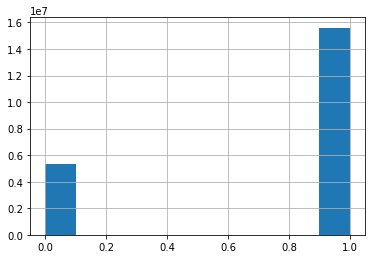

In [53]:
%matplotlib inline
pixelsFrame["solved Cat"].hist()